In [73]:
# Tag: rkdp-opti-v0.1
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Vector multiplication executed by 3 aside threads
"""

v0_1 = {
    1: 0.67904,
    40: 26.071,
    100: 65.8627,
}

v0_1_base = {
    1: 1.07725,
    40: 41.6737,
    100: 104.387,
}

In [74]:
# Tag: rkdp-opti-v0.2
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Each worker thread pre-compute each coefficient
"""

v0_2 = {
    1: 0.693248,
    40: 26.3782,
    100: 66.4351,
}

v0_2_base = {
    1: 1.07725,
    40: 41.6768,
    100: 104.389,
}


In [75]:
# Tag: rkdp-opti-v0.3
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Use shared memory for all shared variables except the input
"""

v0_3 = {
    1: 0.677952,
    40: 26.0813,
    100: 65.8852,
}

v0_3_base = {
    1: 1.07315,
    40: 41.5314,
    100: 104.065,
}

In [76]:
# Tag: rkdp-opti-v0.4
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Use shared memory for coefficient and pre-compute them cooperatively
"""

v0_4 = {
    1: 0.708608,
    40: 26.5051,
    100: 66.4965,
}

v0_4_base = {
    1: 1.07213,
    40: 41.5304,
    100: 104.02,
}

In [77]:
# Tag: rkdp-opti-v0.5
# Number of states: 5
# Number of threads: 4
# Initial step size: 10000
# Delta chord: 1e-4

"""
Improvement of coefficient pre-computation
"""

v0_5 = {
    1: 0.712704,
    40: 26.5257,
    100: 66.646,
}

v0_5_base = {
    1: 1.07315,
    40: 41.5283,
    100: 104.018,
}

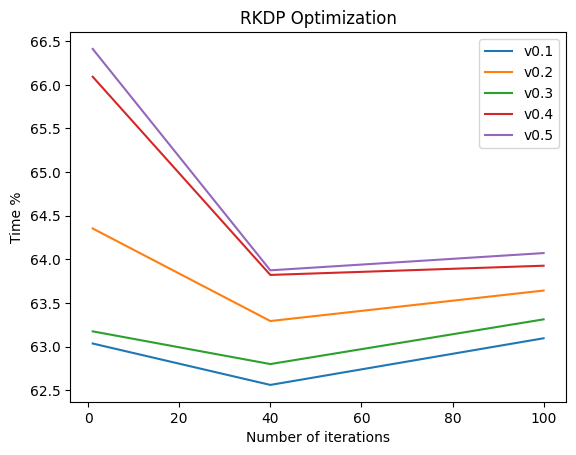

In [78]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.title('RKDP Optimization')
plt.xlabel('Number of iterations')
plt.ylabel('Time %')

# plt.plot(v0_1_base.keys(), [100 for _ in range(len(v0_1_base.values()))], label='Base')

v0_1_percent = [v0_1[key] * 100 / v0_1_base[key] for key in v0_1.keys()]
plt.plot(v0_1.keys(), v0_1_percent, label='v0.1')

v0_2_percent = [v0_2[key] * 100 / v0_2_base[key] for key in v0_2.keys()]
plt.plot(v0_2.keys(), v0_2_percent, label='v0.2')

v0_3_percent = [v0_3[key] * 100 / v0_3_base[key] for key in v0_3.keys()]
plt.plot(v0_3.keys(), v0_3_percent, label='v0.3')

v0_4_percent = [v0_4[key] * 100 / v0_4_base[key] for key in v0_4.keys()]
plt.plot(v0_4.keys(), v0_4_percent, label='v0.4')

v0_5_percent = [v0_5[key] * 100 / v0_5_base[key] for key in v0_5.keys()]
plt.plot(v0_5.keys(), v0_5_percent, label='v0.5')

plt.legend()
plt.show()

In [79]:
import re

line = "info: With states=1 (time in ms):       One_thread=41.2037"
match = re.search(r'info: With states=(\d+) \(time in ms\): +(\w+)=(\d+\.\d+)', line)
print(match.group(1))
print(match.group(2))
print(match.group(3))


1
One_thread
41.2037


In [80]:
# Read data from output.txt and fill data
import re

data = {
    'One thread': {},
    'Global memory': {},
    'Shared memory': {},
}

end_point = {
    'One thread': 0,
    'Global memory': 0,
    'Shared memory': 0,
}

with open('output.txt', 'r') as f:
    for line in f:
        # Example: info: With states=x (time in ms):       One_thread=y
        # x is the number of states
        # y is the time in ms
        if line.startswith('info: With states'):
            match = re.search(r'info: With states=(\d+) \(time in ms\): +(\w+)=(\d+\.\d+)', line)
            if match:
                data[match.group(2).replace('_', ' ')][int(match.group(1))] = float(match.group(3))
                end_point[match.group(2).replace('_', ' ')] = int(match.group(1))


print(data)


{'One thread': {1: 41.1769, 2: 41.2498, 3: 41.5794, 4: 41.5744, 5: 41.5775, 6: 41.5744, 7: 41.5775, 8: 41.5764, 9: 41.5775, 10: 41.5784, 11: 41.5775, 12: 41.5775, 13: 41.5764, 14: 41.5773, 15: 41.5775, 16: 41.5764, 17: 41.5785, 18: 41.5764, 19: 41.5785, 20: 41.6061, 21: 41.5867, 22: 41.5785, 23: 41.5785, 24: 41.5775, 25: 41.5785, 26: 41.5764, 27: 41.5775, 28: 41.5764, 29: 41.5785, 30: 41.5764, 31: 41.5785, 32: 41.5754, 33: 41.6307, 34: 41.6932, 35: 41.6451, 36: 41.7147, 37: 41.6584, 38: 41.73, 39: 41.6532, 40: 41.7341, 41: 41.6553, 42: 41.7403, 43: 41.6553, 44: 41.7403, 45: 41.6543, 46: 41.7403, 47: 41.6573, 48: 41.7444, 49: 41.6604, 50: 41.7331, 51: 41.6604, 52: 41.7464, 53: 41.6573, 54: 41.7372, 55: 41.6584, 56: 41.7393, 57: 41.6553, 58: 41.7391, 59: 41.6512, 60: 41.7413, 61: 41.6541, 62: 41.7321, 63: 41.6573, 64: 41.7382, 65: 41.9328, 66: 41.9011, 67: 41.9543, 68: 41.9738, 69: 41.9604, 70: 41.9164, 71: 41.9584, 72: 41.9779, 73: 41.9523, 74: 41.9236, 75: 41.9533, 76: 41.9758, 77: 41.

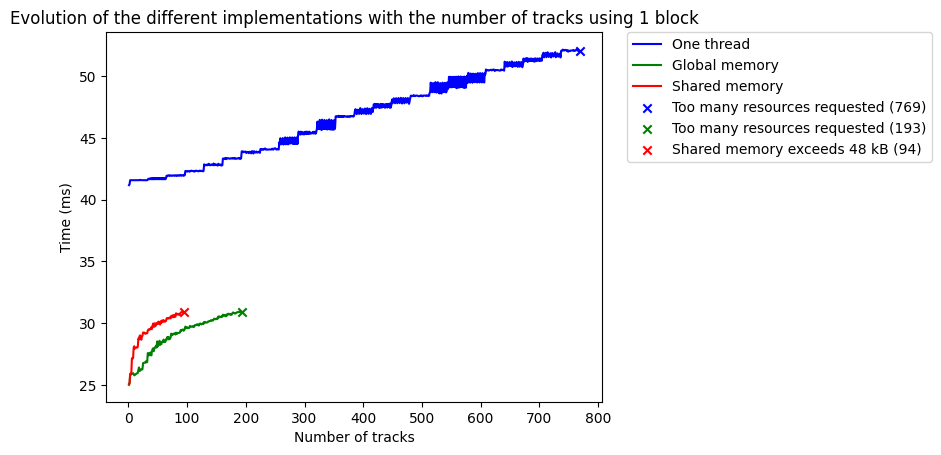

In [83]:
# Plot the data
import matplotlib.pyplot as plt
import numpy as np

plt.plot(data['One thread'].keys(), data['One thread'].values(), label='One thread', color='blue')

plt.plot(data['Global memory'].keys(), data['Global memory'].values(), label='Global memory', color='green')

plt.plot(data['Shared memory'].keys(), data['Shared memory'].values(), label='Shared memory', color='red')

plt.scatter(end_point['One thread'] + 1, data['One thread'][end_point['One thread']], color='blue', marker='x', label=f'Too many resources requested ({end_point["One thread"]+1})')

plt.scatter(end_point['Global memory'] + 1, data['Global memory'][end_point['Global memory']], color='green', marker='x', label=f'Too many resources requested ({end_point["Global memory"]+1})')
            
plt.scatter(end_point['Shared memory'] + 1, data['Shared memory'][end_point['Shared memory']], color='red', marker='x', label=f'Shared memory exceeds 48 kB ({end_point["Shared memory"]+1})')

# Show the label outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.xlabel('Number of tracks')
plt.ylabel('Time (ms)')
plt.title('Evolution of the different implementations with the number of tracks using 1 block')
plt.show()
